Problem 1. (2points)
Open a new notebook in Google Colab and name the notebook as ‘HW2_your-student-id.ipynb’. (For
instance, ‘HW2_00112233.ipynb’ if your student id is 00112233)

Problem 2. (6points)
Import the following libraries.
1. numpy
2. datasets, train_test_split, GaussianNB, metrics from sklearn
3. pyplot from matplotlib

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

Problem 3. (4points)
Load the dataset “digits” from “sklearn.datasets”. (Use “load_digits()”)

In [2]:
digits = datasets.load_digits()

Problem 4. (4points)
Split the “digits” dataset (Use “digits.data” and “digits.target”) into training and test datasets using
“train_test_split”.
Must set the fraction of the test dataset to 10%.

In [14]:
TrainX, TestX, TrainY, TestY = train_test_split(digits.data, digits.target, test_size=0.1, random_state=0)
print(TrainX.shape)
print(TestX.shape)

(1617, 64)
(180, 64)


Problem 5. (4points)
Train a Naïve Bayes model on the training dataset.

In [6]:
model = GaussianNB()
model.fit(TrainX,TrainY)

GaussianNB()

Problem 6. (4points)
Use the trained model to conduct prediction on the training dataset and test dataset

In [13]:
pred_train = model.predict(TrainX)
pred_test = model.predict(TestX)

Problem 7. (4points)
Compute “accuracy” on the training dataset and test dataset. (Use “metrics”)

In [11]:
tr_acc = metrics.accuracy_score(TrainY, pred_train)
ts_acc = metrics.accuracy_score(TestY, pred_test)
print('tr Acc : ', tr_acc)
print('ts Acc : ', ts_acc)

tr Acc :  0.8515769944341373
ts Acc :  0.85


Problem 8. (15points)
* Repeat Problem 4 ~ 7 as setting the fraction of the test dataset to 30%.

Problem 9. (15points)
* Repeat Problem 4 ~ 7 as setting the fraction of the test dataset to 50%.

Problem 10. (15points)
* Repeat Problem 4 ~ 7 as setting the fraction of the test dataset to 70%.

Problem 11. (15points)
* Repeat Problem 4 ~ 7 as setting the fraction of the test dataset to 90%.

In [49]:
def NB_test_size_diff(x):
    TrainX, TestX, TrainY, TestY = train_test_split(digits.data, digits.target, test_size=x, random_state=0)
    model = GaussianNB()
    model.fit(TrainX,TrainY)
    print(TrainX.shape)
    print(TestX.shape)
    pred_train = model.predict(TrainX)
    pred_test = model.predict(TestX)
    tr_acc = metrics.accuracy_score(TrainY, pred_train)
    ts_acc = metrics.accuracy_score(TestY, pred_test)
    print('tr Acc : ', tr_acc)
    print('ts Acc : ', ts_acc)

NB_test_size_diff(0.3)
NB_test_size_diff(0.5)
NB_test_size_diff(0.7)
NB_test_size_diff(0.9)


(1257, 64)
(540, 64)
tr Acc :  0.8591885441527446
ts Acc :  0.8240740740740741
(898, 64)
(899, 64)
tr Acc :  0.8752783964365256
ts Acc :  0.8342602892102335
(539, 64)
(1258, 64)
tr Acc :  0.8682745825602969
ts Acc :  0.8251192368839427
(179, 64)
(1618, 64)
tr Acc :  0.9162011173184358
ts Acc :  0.8108776266996292


Problem 12. (10points)
Plot (“plot” in pyplot) the training and test accuracy of the above experiments (i.e., results for the
experiments with the ratio of the test dataset 10%, 30%, 50%, 70%, and 90%) in an ascending order of the
fraction of the test dataset.

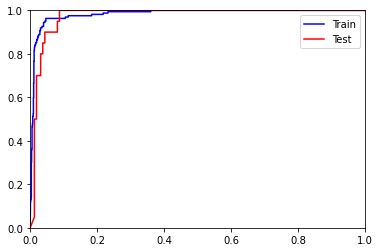

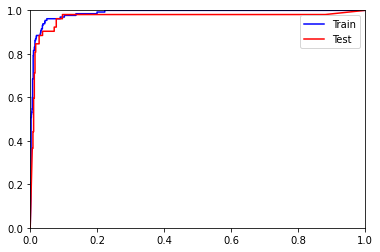

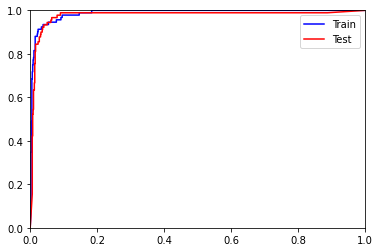

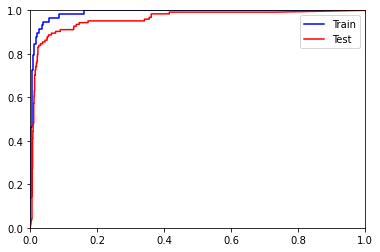

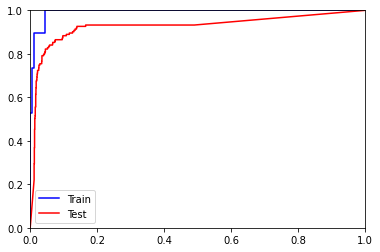

In [53]:
def plt_ROC(x):
    TrainX, TestX, TrainY, TestY = train_test_split(digits.data, digits.target, test_size=x, random_state=0)
    model = GaussianNB()
    model.fit(TrainX,TrainY)
    pred_train = model.predict(TrainX)
    pred_test = model.predict(TestX)
    tr_acc = metrics.accuracy_score(TrainY, pred_train)
    ts_acc = metrics.accuracy_score(TestY, pred_test)

    score_train = model.predict_proba(TrainX)
    score_test = model.predict_proba(TestX)
    tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, score_train[:,1], pos_label=1)
    ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, score_test[:,1], pos_label=1)

    plt.plot(tr_fpr, tr_tpr, color='b', label='Train')
    plt.plot(ts_fpr, ts_tpr, color='r', label='Test')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc='best')
    plt.show()

plt_ROC(0.1)
plt_ROC(0.3)
plt_ROC(0.5)
plt_ROC(0.7)
plt_ROC(0.9)


Problem 13. (2points)
Submit your notebook file ‘HW2_your-student-id.ipynb’ to “Blackboard”.